In [1]:
import ROOT
import rootnotes
c1 = rootnotes.default_canvas()

In [2]:
identifier = "ggfZZ" # avaliable: ggfWW, vbfWW, vbfZZ, ggfZZ, vbfMuMu 
infilename = "/eos/user/v/vcroft/morphingInputs/ggfhzz4l_2d.root" # give the input file name here
observable = "base/phi" # name of the observable to be used (histogram name)

define the names of the input samples

In [3]:
samplelist = ["s1","s2","s3"]
# these are the validation samples: "v0","v1"

push all the input samples in a RooArgList

In [4]:
inputs = ROOT.RooArgList()

we need the additional list "inputnames" to prevent the python garbage collector from deleting the RooStringVars

In [5]:
inputnames = []
for sample in samplelist:
    v = ROOT.RooStringVar(sample,sample,sample)
    inputnames.append(v)
    inputs.add(v)

setup predefined morphfunc

In [6]:
morphfunc = ROOT.RooHCggfZZMorphFunc(identifier,identifier,infilename,observable,inputs)

define standard model

In [7]:
standardmodel = "s1"
morphfunc.setParameters(standardmodel)

In [8]:
g = ROOT.TGraphErrors()
for i, val in enumerate(range(-5,5)):
    morphfunc.setParameter("kAzz",val)
    g.SetPoint(i,val,morphfunc.expectedEvents())
    g.SetPointError(i,0,morphfunc.expectedUncertainty())
    i = i + 1

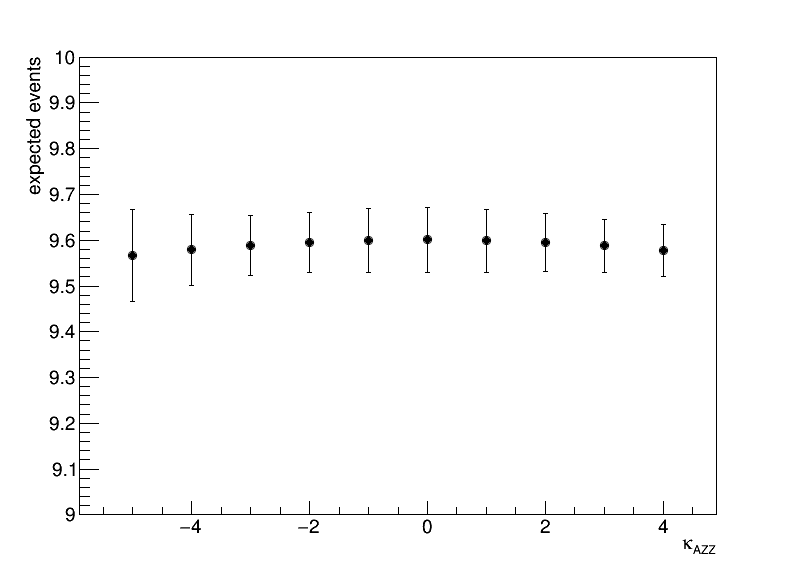

In [9]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
g.SetMarkerStyle(20)
g.GetYaxis().SetRangeUser(9,10)
g.Draw("AEP")
g.GetXaxis().SetTitle("#kappa_{AZZ}")
g.GetYaxis().SetTitle("expected events")
c1